In [ ]:
# this project is Sign Language Detection using ACTION RECOGNITION with Python by nicholas renotte
# coded by trishit nath thakur

## importing and installing dependencies

In [1]:
!pip install tensorflow==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2                             # LSTM DL model
import numpy as np                     # store data as np arrays, detect action using a number of frames
import os                              # using mediapipe holistics to easily grab the keypoints and saving as frame
from matplotlib import pyplot as plt
import time                            # time used to sleep between different positions
import mediapipe as mp

## keypoints using mp holistics 

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image.flags.writeable = False                     # image not writable to save memory
    
    results = model.process(image)
    
    image.flags.writeable = True                      # make image writeable
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [5]:
def draw_landmarks(image, results):
    
    # Draw face connections
    
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    
    # Draw pose connections
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    
    # Draw left hand connections
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    
    # Draw right hand connections  
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [9]:
cap = cv2.VideoCapture(0)

# setting mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # min_detection_confidence used to specify the minimum confidence value with which the detection from the person-detection model needs to be considered as successful
    # min_tracking_confidence used to specify the minimum confidence value with which the detection from the landmark-tracking model must be considered as successful
    
    while cap.isOpened():
        # reading the frame
        ret, frame = cap.read()
        
        # making detection
        image, results = mediapipe_detection(frame, holistic)
        
        # drawing landmarks
        draw_landmarks(image, results)
        
        cv2.imshow('openCV Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
        
             break
        
    cap.release()
    cv2.destroyAllWindows()

In [10]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame, results)

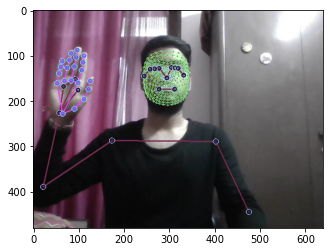

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

##  extracting keypoint values

In [14]:
results.pose_landmarks

landmark {
  x: 0.4622359275817871
  y: 0.3119201362133026
  z: -0.7738863825798035
  visibility: 0.9999328255653381
}
landmark {
  x: 0.4777868390083313
  y: 0.2645021378993988
  z: -0.7104088664054871
  visibility: 0.9998544454574585
}
landmark {
  x: 0.4896443784236908
  y: 0.2659496068954468
  z: -0.7102965116500854
  visibility: 0.9998135566711426
}
landmark {
  x: 0.5006090402603149
  y: 0.2674322724342346
  z: -0.7104877233505249
  visibility: 0.9998082518577576
}
landmark {
  x: 0.4356498718261719
  y: 0.2670972943305969
  z: -0.7123404145240784
  visibility: 0.9998915791511536
}
landmark {
  x: 0.41972336173057556
  y: 0.26974496245384216
  z: -0.7122619152069092
  visibility: 0.9999048709869385
}
landmark {
  x: 0.4042579233646393
  y: 0.27204465866088867
  z: -0.7125899195671082
  visibility: 0.9999293684959412
}
landmark {
  x: 0.5188263654708862
  y: 0.29901954531669617
  z: -0.34732213616371155
  visibility: 0.9997693300247192
}
landmark {
  x: 0.3832147717475891
  y: 0.3

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.46223593,  0.31192014, -0.77388638, ...,  0.10009661,
        0.23407163, -0.02340854])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.46223593,  0.31192014, -0.77388638, ...,  0.10009661,
        0.23407163, -0.02340854])

## setup folders for collection 

In [25]:
DATA_PATH = os.path.join('MP_DATA')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [26]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## collecting keypoint values for training and testing 

In [81]:
cap = cv2.VideoCapture(0)
  
 # setting mediapipe model   
    
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # loop through the action
    for action in actions:
        # loop through videos
        for sequence in range(no_sequences):
            # loop through the frames
            for frame_num in range(sequence_length):

             
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                

                # Draw landmarks
                draw_landmarks(image, results)
                
                # waiting logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                   
                    
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

               
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## preprocess data and create feature labels

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [30]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
np.array(sequences).shape

(90, 30, 1662)

In [32]:
np.array(labels).shape

(90,)

In [33]:
X = np.array(sequences)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## Build and Train LSTM Neural Network

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
model.fit(X_train, y_train, epochs = 170, callbacks = [tb_callback])

Epoch 1/170
3/3 [==============================] - 4s 297ms/step - loss: 1.7646 - categorical_accuracy: 0.3756
Epoch 2/170
3/3 [==============================] - 0s 71ms/step - loss: 5.5092 - categorical_accuracy: 0.3523
Epoch 3/170
3/3 [==============================] - 0s 71ms/step - loss: 3.7308 - categorical_accuracy: 0.3561
Epoch 4/170
3/3 [==============================] - 0s 72ms/step - loss: 1.6377 - categorical_accuracy: 0.2388
Epoch 5/170
3/3 [==============================] - 0s 79ms/step - loss: 3.4648 - categorical_accuracy: 0.4383
Epoch 6/170
3/3 [==============================] - 0s 70ms/step - loss: 3.6054 - categorical_accuracy: 0.5146
Epoch 7/170
3/3 [==============================] - 0s 73ms/step - loss: 1.5879 - categorical_accuracy: 0.3620
Epoch 8/170
3/3 [==============================] - 0s 74ms/step - loss: 1.6160 - categorical_accuracy: 0.2897
Epoch 9/170
3/3 [==============================] - 0s 67ms/step - loss: 1.0725 - categorical_accuracy: 0.4657
Epoch 10/

3/3 [==============================] - 0s 67ms/step - loss: 3.3575e-05 - categorical_accuracy: 1.0000
Epoch 144/170
3/3 [==============================] - 0s 66ms/step - loss: 3.3470e-05 - categorical_accuracy: 1.0000
Epoch 145/170
3/3 [==============================] - 0s 67ms/step - loss: 3.2428e-05 - categorical_accuracy: 1.0000
Epoch 146/170
3/3 [==============================] - 0s 65ms/step - loss: 3.4526e-05 - categorical_accuracy: 1.0000
Epoch 147/170
3/3 [==============================] - 0s 73ms/step - loss: 3.2830e-05 - categorical_accuracy: 1.0000
Epoch 148/170
3/3 [==============================] - 0s 68ms/step - loss: 3.3884e-05 - categorical_accuracy: 1.0000
Epoch 149/170
3/3 [==============================] - 0s 69ms/step - loss: 3.4802e-05 - categorical_accuracy: 1.0000
Epoch 150/170
3/3 [==============================] - 0s 66ms/step - loss: 3.4083e-05 - categorical_accuracy: 1.0000
Epoch 151/170
3/3 [==============================] - 0s 76ms/step - loss: 3.3667e-05 -

## Make Predictions 

In [41]:
res = model.predict(X_test)

In [42]:
actions[np.argmax(res[4])]

'iloveyou'

In [43]:
model.save('action.h5')

In [44]:
model.load_weights('action.h5')

## evaluation using confusion matrix and accuracy

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
yhat = model.predict(X_test)

In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [48]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [49]:
accuracy_score(ytrue, yhat)

1.0

## real time 

In [50]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [51]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [56]:
sequence = []
sentence = []
predictions = []
threshold = 0.7


cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        
        draw_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis = 0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
            image = prob_viz(res, actions, image, colors)
            
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            
            cv2.imshow('openCV Feed', image)
        
            if cv2.waitKey(10) & 0xFF == ord('q'):
        
               break
        
    cap.release()
    cv2.destroyAllWindows()

iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
t

thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
thanks
